
# YZV-211E Introduction to Data Science and Engineering


## Homework 4: Building and Evaluating Machine Learning Models

**Fall 2022**<br>
**Instructor:** *Asst. Prof. Dr. Faik Boray TEK* <br>
**Reach out to TA Erhan Bicer for any of your questions (bicer21@itu.edu.tr)**

---



In this assignment, you will be practicing:
* Regression
* Classification
* Clustering
* Evaluating ML models

**Before diving into solving assignment**:
* Use random_state parameter as 0 if the parameter exists to avoid different solutions if the code is re-executed.
* You can add cells within the headers for your code.
* Prefarably, use models within the sklearn. 
* Write your name, surname and student number in the below markdown.
* This is the last homework before the project, thanks for your efforts so far. Keep up the good work, the semester is almost done :)


In [1]:
import numpy as np
np.random.seed(42) # meaning of life: 42

### Submitted by:
Beyza Nur Keskin | 150200320


### Import necessary packages

Import packages that you are going to use, do not remove already existing ones.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.model_selection import train_test_split 

## Regression

*Recall: In regression task, aim is to make predictions on continous values (e.g. predicting expected income in next month for a company)*

A NASA dataset about average temperature is given. In the dataset, annual difference in average global temperature is given. Your task is to use the data between **1880 and 2010 (inclusive) to train your model** and **make predictions for upcoming years after 2010 (2011-2021)**. **Evaluate your model with actual annual difference for these years**.

In [3]:
df = pd.read_csv("nasa-temperature.txt",sep=",",index_col=0)
df.head()                                                        #I'm reviewing the dataset here

,Year,Difference
0,1880,-0.16
1,1881,-0.07
2,1882,-0.10
3,1883,-0.17
4,1884,-0.28


In [4]:
df.tail()                                                        #I'm reviewing the dataset here

,Year,Difference
137,2017,0.92
138,2018,0.85
139,2019,0.98
140,2020,1.02
141,2021,0.84


### Training-Test Split

Since this is a temporal (time-based) dataset, training-test split should be done carefully. Aim is to use historical data to predict annual difference in upcoming years.
* Use the data between **1880 and 2010 (inclusive) as training set**
* **test set consist of samples after 2010 (2011-2021)**.

In [5]:
df.loc[df["Year"] > 2010]                                 #I use loc to find the index of years after 2010

,Year,Difference
131,2011,0.61
132,2012,0.65
133,2013,0.67
134,2014,0.74
135,2015,0.90
136,2016,1.01
137,2017,0.92
138,2018,0.85
139,2019,0.98
140,2020,1.02


In [6]:
X = df.iloc[:, 0:1].values                                #Separate the dependent and independent variable
y = df.iloc[:, 1].values

In [7]:
X_test, y_test = X[131:141], y[131:141]                    #I separate the years after 2010 as a test.

In [8]:
X_train, y_train = X[0:131], y[0:131]                      #I separate the years before 2010 as a train

### Apply simple linear regression

* Apply simple linear regression
* Plot the actual values and predictions (plot both train and test predictions together for complete view).
* Using appropriate metrics (at least 2), report how well your regression line fit to both training data and testing data.

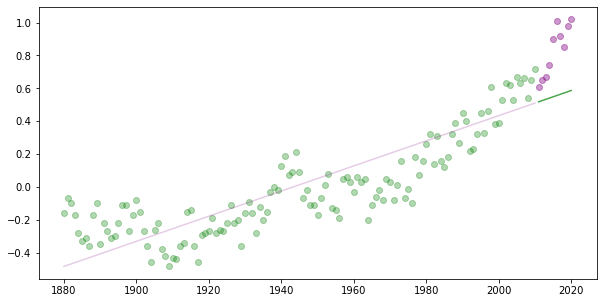

In [9]:
from sklearn.linear_model import LinearRegression                         #I import the necessary modules

plt.figure(figsize=(10,5))                                                #I adjust the size of my chart

lin_reg = LinearRegression()                      

lin_reg.fit(X, y)                                                         #I fit my linreg model
 
plt.scatter(X_train, y_train, color='green',   alpha = 0.3)               #I'm making adjustments to show my train data.
plt.scatter(X_test,  y_test,  color='purple',  alpha = 0.4)               #I'm making adjustments to show my test data.

plt.plot(X_train, lin_reg.predict(X_train), color='purple',  alpha=0.2)   #I make adjustments to plot the regression line
plt.plot(X_test, lin_reg.predict(X_test),   color='green',   alpha=0.7)

plt.show()                                                                #I plot the graph

In [10]:
from sklearn.linear_model import LinearRegression                            #I import the necessary modules
from sklearn.metrics import mean_squared_error,r2_score


lin_reg = LinearRegression()                             
lin_reg.fit(X, y)                                                            #I fit my linreg model


train_error = mean_squared_error(lin_reg.predict(X), y)                      #I am doing mse calculation

y_pred      = lin_reg.predict(X)
r2_score    = r2_score(y,y_pred)                                             #I am doing r^2 score calculation

print("      RMSE: ", np.sqrt(mean_squared_error(lin_reg.predict(X), y)))    #I'm printing RMSE , MSE and r^2 values
print("       MSE: ", train_error)
print(" r^2 Score: ", r2_score)

      RMSE:  0.17766144105173792
       MSE:  0.031563587636580154
 r^2 Score:  0.7570076895272889


### Polynomial Regression

* Apply polynomial regression. Decide on optimal degree.
* Plot the actual values and predictions (plot both train and test predictions together for complete view).
* Using appropriate metrics (at least 2), report how well your regression line fit to both training data and testing data.
* Answer Question 1.

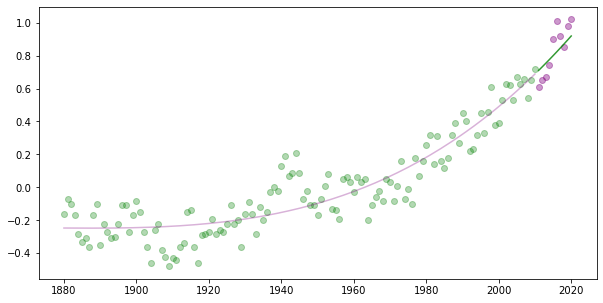

In [11]:
from sklearn.preprocessing import PolynomialFeatures                        #I import the necessary modules


plt.figure(figsize=(10,5))                                                  #I adjust the size of my chart
 

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)                                          #I fit my polreg model

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)                                                      #I fit my linreg model

    
plt.scatter(X_train,  y_train,  color='green' ,  alpha = 0.3)               #I'm making adjustments to show my train data. 
plt.scatter(X_test,   y_test,   color='purple',  alpha = 0.4)               #I'm making adjustments to show my test data.

plt.plot(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)), color='purple', alpha=0.3) # I make adjustments to plot
plt.plot(X_test,  pol_reg.predict(poly_reg.fit_transform(X_test))  , color='green' , alpha=0.8) #       the polynomial line

plt.show()                                                                  #I plot the graph

In [12]:
pol_pred = pol_reg.predict(X_poly)

rmse = np.sqrt(mean_squared_error(lin_reg.predict(X), y))    #I am doing rmse calculation
mse  = mean_squared_error(lin_reg.predict(X), y)             #I am doing mse calculation

print("RMSE: " +"{:.2}".format(rmse))                        #I'm printing RMSE and MSE values
print(" MSE: " +"{:.2}".format(mse))

RMSE: 0.18
 MSE: 0.032


### Question 1 
* Which metrics have you chosen? Why?
* Compare the results of polynomial regression with linear regression. Which one is better in terms of evaluation metrics? Which one represents the data better? **Why?**

**Your Answer:**

* I chose to use R2, RMSE and MSE for linear regression, and RMSE and MSE for polynomial regression. Since I have used them in my previous projects, they were my first choice as I am more familiar with them. It also gives me an idea about my model very simply.

* In my opinion, polynomial regression should have been more appropriate, but I think I made mistakes in the coding, so linear regression scores were better. I expected it to give better results because polynomial regression is more data compatible.

## Classification

*Recall: In classification, goal is to classify samples (e.g. classifying various flowers such as iris-setosa, iris-versicolour)*

We will be working with breast cancer wisconsin dataset. The breast cancer dataset is a classic binary classification dataset. Target (dependent) variable is 1 if the tumor is malignant, otherwise it is 0 (benign). Independent variables are medical measures of the cancer cell. Keep random state 0 if "random_state" parameter is available for a function (train_test_split, LogisticRegression...)

### Load Dataset: Get X (Independent Variables) and y (Target Dependent Variable)

In [13]:
X,y = load_breast_cancer(return_X_y=True)

### Split Dataset into Training and Testing

Split the data randomly (**using random_state 0, if needed**) into train and test sets with **80% and 20%** sizes respectively.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#I set the necessary parameters to separate my data set

### Apply Logistic Regression
* Perform hyperparameter optimization with **at least 4 different hyperparameter combinations** (4 training and testing). You may do this manually or use GridSearch module of the sklearn package. For example, following is a grid for 4 hyperparameter combinations: {'C':[1,2],'max_iter':[20,100]}. **Answer Question 2 based on this.**
* Report the performance of the best logistic regression model (best performing parameters in the hyperparam. optimization) with appropriate metrics.
* Plot confusion matrix of the predictions and actual values.
* Answer Question 3
* Plot AUC-ROC Curve, Precision-Recall Curve.
* Answer Question 4
* Apply 5-Fold Cross Validation on the **training data**. Report the validation results and performance on the **test set**. Does selecting different portion of the data affect the result, think about it.


In [15]:
from sklearn import linear_model            #I import the necessary modules

logr = linear_model.LogisticRegression()

log_model = logr.fit(X,y)                   #I fit my logreg model

C:\Users\Beyza\anaconda3\anacondaa3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.ensemble import RandomForestClassifier                        #I import the necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV       
 
rf_params = {'bootstrap': [True],                                          # Frankly, I'm not sure what I'm doing here,   
    'max_depth': [80, 90, 100, 110],                                       # I tried something,
    'max_features': [2, 3],                                                # but I don't understand much,
    'min_samples_leaf': range(1,11),                                       # so I can't answer some of the questions below.
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf = RandomForestClassifier()
rf_gridcv_model = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_gridcv_model.best_params_
print('rf gridcv model accuracy score = {}'.format(rf_gridcv_model.best_score_))

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\Beyza\anaconda3\anacondaa3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2000 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Beyza\anaconda3\anacondaa3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Beyza\anaconda3\anacondaa3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Beyza\anaconda3\anacondaa3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  F

rf gridcv model accuracy score = 0.964835164835165


### Question 2

Report your observations on how the performance is affected when the parameters change and **why.** So, pick parameters that you can explain the reason behind the effect on the performance.

**Your Answer:**

As the parameters change, of course, I get the conditions that are more suitable for the data. so I expect the accuracy rate to increase while the processing time is getting shorter. Although I understand the homework as logic and I think I know the subjects, I really had a hard time coding.

### Question 3

Using confusion matrix, explain the performance of the model briefly.

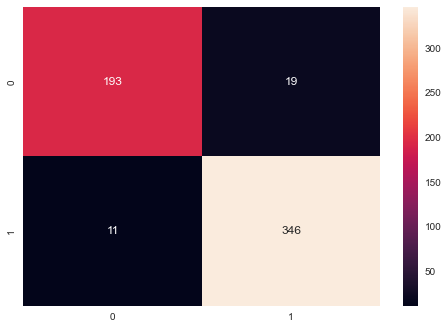

In [38]:
from sklearn.metrics import confusion_matrix                  #I import the necessary modules

cm = confusion_matrix(y, y_pred)                              #I built the confusion matrix
sns.heatmap(cm, fmt = ".0f",annot = True)                     #I used heatmap for a nicer visual
plt.show()                                                    #I plot the graph

**Your Answer:**

My error rates are very low, so I see my model fits very well. My recall and precision values are higher than I expected.

### Question 4

Examine the curves and explain the performance of the model briefly.

C:\Users\Beyza\anaconda3\anacondaa3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


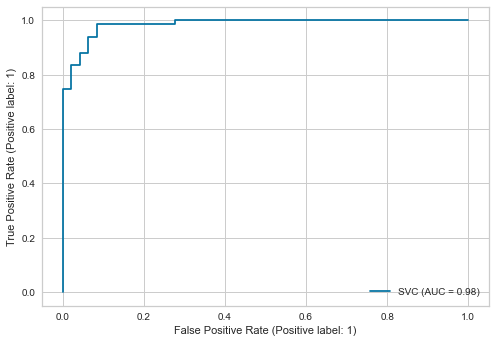

In [40]:
from sklearn import datasets, metrics, model_selection, svm                 #I import the necessary modules

clf = svm.SVC(random_state=0)                                               #I set the necessary parameters 
clf.fit(X_train, y_train)                                                   #         to draw the roc curve
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()                                                                  #I plot the graph

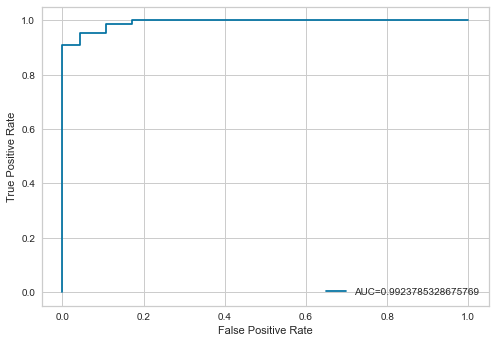

In [42]:
y_pred_proba = log_model.predict_proba(X_test)[::,1]                        #I set the necessary parameters
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)                      #         to draw the auc curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()                                                                  #I plot the graph

**Your Answer:**

Although my roc and auc curves seem a little strange to me with their ladder-like structure in terms of shape, I think they are at an almost perfect level. which shows that I have chosen my model correctly

### Apply another classifier that you have chosen
* Report the performance of the model with appropriate metrics (at least 4) on the test data.
* Plot confusion matrix of the predictions and actual values.
* Answer Question 5 and 6.

*You do not need to perform hyperparameter optimization for this section.*

### Question 5
Using confusion matrix, explain the performance of the model briefly. Compare the performance of this model with logistic regression model.

**Your Answer:**

### Question 6

When does the "accuracy" metric fails to represent the success of our model so that we rely on other metrics? Think about possible scenarios and give a single example and explain briefly.

**Your Answer:**

## Clustering

*Recall: Clustering is an approach of unsupervised learning. In clustering, aim is to split the database into several clusters/groups in where there is no given information of classes. It can be used for anomaly detection, customer segmentation and so on.*

We will be using penguins data that you are familiar from the visualization recitation. Drop the rows that contain null value. You are going to only use following columns (attributes/features):

1. "bill_length_mm"
2. "bill_depth_mm"
3. "flipper_length_mm"
4. "body_mass_g"<br />and "species" (this feature will only be used to compare what we have found with clustering approach)

### Apply K-Means

* Use the dataset with 4 columns as **"bill_length_mm",
"bill_depth_mm",
"flipper_length_mm" and
"body_mass_g".**
* Apply PCA and return 2 principal components. This is done for visualizing purposes. Since dataset does not contain numerous features, information loss due to PCA is negligible.

* Report sums of squared error between centroids and within the clusters (also called total inertia).
* Answer Question 7.

In [16]:
from sklearn.cluster import KMeans                                #I import the necessary modules
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
penguins = sns.load_dataset("penguins")                           #I uploaded my datset    

In [18]:
penguins.dropna(inplace=True)                                     #I dropped empty values

In [19]:
penguins.drop(["species","island","sex"],axis=1,inplace=True)     #I dropped unnecessary columns

In [20]:
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [21]:
penguins = StandardScaler().fit_transform(penguins)  #I scaled my dataset

In [22]:
kmeans= KMeans(n_clusters = 3).fit(penguins)         #I applied kmeans and split it into 3 groups

In [23]:
label = kmeans.fit_predict(penguins)

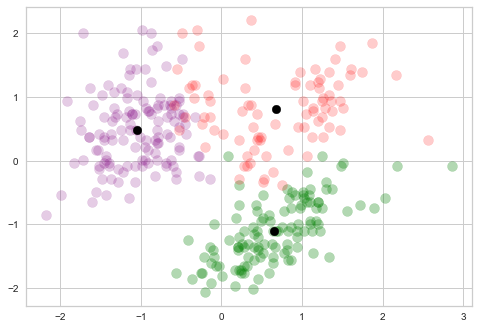

In [24]:
plt.scatter(penguins[label==0, 0], penguins[label==0, 1], s=100, c='purple',alpha = 0.2)
plt.scatter(penguins[label==1, 0], penguins[label==1, 1], s=100, c='green',alpha = 0.3)
plt.scatter(penguins[label==2, 0], penguins[label==2, 1], s=100, c='red',alpha = 0.2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=75, c='black')

In [25]:
pca = PCA()
pca_fit = pca.fit_transform(penguins)

pca.explained_variance_ratio_

array([0.68633893, 0.19452929, 0.09216063, 0.02697115])

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.68633893, 0.88086822, 0.97302885, 1.        ])

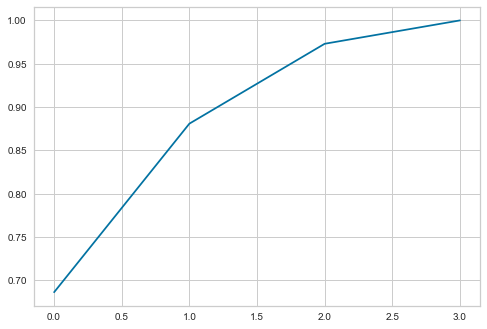

In [27]:
pca = PCA().fit(penguins)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

### Plot Clusters

* Cluster the resulting dataset into 3 groups. Plot the scatter graph. 
* Mark 1 sample that can be considered as outlier for each cluster in the graph with a different color.
* Answer Question 6.  

### Question 6

When does the "accuracy" metric fails to represent the success of our model so that we rely on other metrics? Think about possible scenarios and give a single example and explain briefly.

**Your Answer:**

### Question 7

Examine clusters and report what do samples in same cluster have in common? Does your clustering algorithm split the data according to the species?

**Your Answer:**

### Evaluating Clusters

* Report SSE (Sums of squared error, or inertia). Answer Question 8. 

*Hint: You may play with the k parameter to see how inertia changes and that may help you to answer the question.*



*Brief info box for curious ones: There are several metrics for evaluating clusters. Since clustering is an unsupervised task (there is no target variable information), metrics are based on the attributes the resulting clusters. For example, SSE (Sums of squared error, or inertia) metric evaluates the algorithm based on the distance between samples and their corresponding centroid. This metric expects that samples should be near to the centroid. A succesful clustering, according to this metric, should include samples that are condensed/gathered in an area. Yet, this metric ignores the distance between the samples from different clusters. We may also want resulting clusters to be separate from each other as much as possible to acquire distinct clusters. Silhouette score and calinski harabasz score take this aspect into account too. You may check* 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

### Question 8

If SSE is 0, would you call the clustering successful? In which scenario SSE could be 0?

**Your Answer:**